In [103]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [145]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz import trees 

import graphviz
import pandas as pd
from dtreeviz.shadow import ShadowDecTree
from dtreeviz.shadow2 import ShadowDecTree2

In [118]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
dtc = DecisionTreeClassifier(max_depth=3, random_state=random_state)
dtc.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## Check shadow tree creation

In [171]:
??dtc.tree_

In [120]:
shadow = ShadowDecTree(dtc, dataset[features], dataset[target], feature_names=features, class_names=target)

In [121]:
shadow2 = ShadowDecTree2(dtc, dataset[features], dataset[target], feature_names=features, class_names=target)

In [122]:
shadow.feature_names, shadow2.feature_names

(['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label'],
 ['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label'])

In [123]:
shadow.class_names, shadow2.class_names

({0: 'S', 1: 'u', 2: 'r', 3: 'v', 4: 'i', 5: 'v', 6: 'e', 7: 'd'},
 {0: 'S', 1: 'u', 2: 'r', 3: 'v', 4: 'i', 5: 'v', 6: 'e', 7: 'd'})

In [124]:
print(shadow.class_weight)
print(shadow2.class_weight)

None
None


In [125]:
print(shadow.y_train)
print(shadow2.y_train)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [126]:
shadow.node_to_samples

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [127]:
shadow2.node_to_samples

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [148]:
dtc.classes_

array([0, 1])

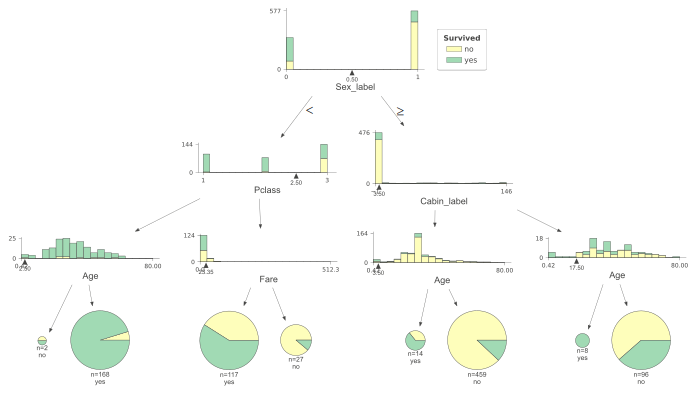

In [149]:
# TODO
# - need to find a way to call this function in an easier way, ex. get class_name from dtc.classes_ inside the function 
trees.dtreeviz(dtc, dataset[features], dataset[target], feature_names=features, target_name=target, class_names=["no", "yes"])

In [134]:
len(shadow.leaves), len(shadow2.leaves)

(8, 8)

In [170]:
[node.id for node in shadow.internal], [node.id for node in shadow2.internal]

([2, 5, 1, 9, 12, 8, 0], [2, 5, 1, 9, 12, 8, 0])

In [176]:
[node.nsamples() for node in shadow.internal], [node.nsamples() for node in shadow2.internal]

([170, 144, 314, 473, 104, 577, 891], [170, 144, 314, 473, 104, 577, 891])

In [177]:
[node.nsamples() for node in shadow.leaves], [node.nsamples() for node in shadow2.leaves]

([2, 168, 117, 27, 14, 459, 8, 96], [2, 168, 117, 27, 14, 459, 8, 96])

In [183]:
[node.isclassifier() for node in shadow.leaves], [node.isclassifier() for node in shadow2.leaves]

([array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True])],
 [array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True])])

In [186]:
[node.isleaf() for node in shadow.leaves], [node.isleaf() for node in shadow2.leaves]

([True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True])

In [180]:
shadow.internal[1].split_samples(), shadow2.internal[1].split_samples()

((array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  29,
          30,  31,  32,  33,  35,  37,  39,  40,  41,  42,  43,  44,  45,
          48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
          61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
          74,  75,  76,  77,  79,  81,  82,  84,  85,  86,  87,  88,  90,
          91,  92,  93,  94,  97,  98,  99, 100, 101, 102, 103, 105, 106,
         110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124,
         125, 126, 127, 129, 131, 133, 134, 135, 136, 137, 138, 140, 141]),
  array([  8,  18,  24,  28,  34,  36,  38,  46,  47,  78,  80,  83,  89,
          95,  96, 104, 107, 108, 109, 116, 123, 128, 130, 132, 139, 142,
         143])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  29,
          30,  31, 

In [182]:
shadow.internal[0].isclassifier(), shadow2.internal[0].isclassifier()

(array([ True]), array([ True]))

In [165]:
def print_node_info(index, node_type : ("internal", "leaf")):
    if node_type == "leaf":
        node, node2 = shadow.leaves[index], shadow2.leaves[index]
    elif node_type == "internal":
        node, node2 = shadow.internal[index], shadow2.internal[index]

    print(f"node id {node.id}, {node2.id}")
    print(f"node split {node.split()}, {node2.split()}")
    print(f"node feature index {node.feature()}, {node2.feature()}")
    print(f"node feature name {node.feature_name()}, {node2.feature_name()}")
    print(f"node feature samples {node.samples()}, {node2.samples()}")

    

In [166]:
print_node_info(0, node_type="internal")
print_node_info(1, node_type="internal")

node id 2, 2
node split 2.5, 2.5
node feature index 1, 1
node feature name Age, Age
node feature samples [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 98, 123, 133, 136, 151, 161, 166, 177, 190, 194, 195, 199, 211, 215, 218, 230, 237, 247, 256, 257, 258, 259, 268, 269, 272, 275, 290, 291, 297, 299, 303, 306, 307, 309, 310, 311, 312, 316, 318, 319, 322, 323, 325, 327, 329, 334, 337, 341, 345, 346, 356, 357, 366, 369, 375, 380, 383, 387, 389, 393, 399, 412, 416, 417, 426, 427, 432, 435, 437, 440, 443, 446, 457, 458, 472, 473, 486, 496, 498, 504, 506, 513, 516, 518, 520, 523, 526, 530, 535, 537, 539, 540, 546, 556, 558, 571, 576, 577, 580, 581, 585, 591, 596, 600, 608, 609, 615, 618, 627, 635, 641, 651, 669, 670, 689, 700, 706, 708, 710, 716, 717, 720, 726, 730, 742, 747, 750, 754, 759, 763, 765, 772, 774, 779, 781, 796, 801, 809, 820, 829, 835, 842, 849, 853, 854, 856, 862, 865, 866, 871, 874, 879, 880, 887], [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 9

In [161]:
print_node_info(0, node_type="leaf")
print_node_info(1, node_type="leaf")

leaf id 3, 3
leaf split -2.0, -2.0
leaf feature index -2, -2
leaf feature name Cabin_label, Cabin_label
leaf feature name [297, 530], [297, 530]
leaf id 4, 4
leaf split -2.0, -2.0
leaf feature index -2, -2
leaf feature name Cabin_label, Cabin_label
leaf feature name [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 98, 123, 133, 136, 151, 161, 166, 177, 190, 194, 195, 199, 211, 215, 218, 230, 237, 247, 256, 257, 258, 259, 268, 269, 272, 275, 290, 291, 299, 303, 306, 307, 309, 310, 311, 312, 316, 318, 319, 322, 323, 325, 327, 329, 334, 337, 341, 345, 346, 356, 357, 366, 369, 375, 380, 383, 387, 389, 393, 399, 412, 416, 417, 426, 427, 432, 435, 437, 440, 443, 446, 457, 458, 472, 473, 486, 496, 498, 504, 506, 513, 516, 518, 520, 523, 526, 535, 537, 539, 540, 546, 556, 558, 571, 576, 577, 580, 581, 585, 591, 596, 600, 608, 609, 615, 618, 627, 635, 641, 651, 669, 670, 689, 700, 706, 708, 710, 716, 717, 720, 726, 730, 742, 747, 750, 754, 759, 763, 765, 772, 774, 779, 781, 796, 80

In [90]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_label,Cabin_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,-1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,-1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,60,0


In [19]:
??dataset.values

In [11]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
dtr = DecisionTreeRegressor(max_depth=6, random_state=random_state, criterion="mae")
dtr.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [12]:
dtr.tree_.n_classes

array([1])